# ÖDEV7
# Abdullah MEMİŞOĞLU
# 171024001 


In [96]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as sgnl 
from scipy.fftpack import fft, ifft
from scipy.io import loadmat

# ÖN ÇALIŞMA 

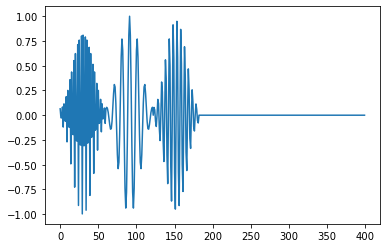

In [97]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency components)
n = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5) # component with w1 = 0.8*pi frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)
plt.figure()
plt.plot(xn)

([<matplotlib.lines.Line2D at 0x1edefa01a48>],
 Text(0, 0.5, 'phase (rad)'),
 Text(0.5, 0, 'frequency rad/ ,→sample'))

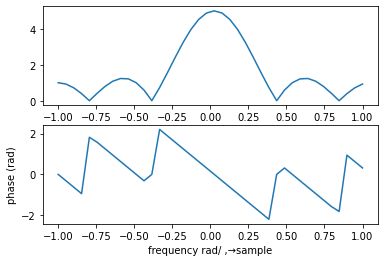

In [98]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))
w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('phase (rad)'), plt.xlabel('frequency rad/ ,→sample')

Text(0, 0.5, 'group delay (samples)')

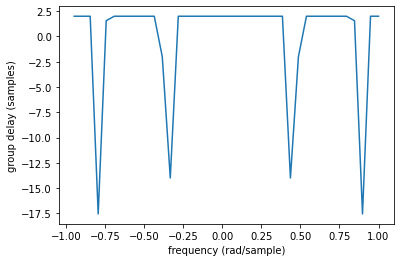

In [99]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

In [100]:
n = np.arange(0, N, 1) # first create the index vector at N points
w0 = 0.1*np.pi # frequency of the input signal
xn = np.cos(w0*n) # create the input signal at w0
Xw = np.fft.fftshift(fft(xn, N)) # compute the frequency response (in the␣,→[-pi pi] interval)
Yw_shifted = Hw * Xw # compute the fft of the output signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw))

(<StemContainer object of 3 artists>, None)

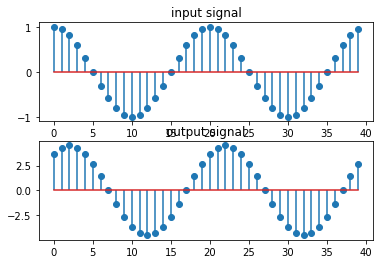

In [101]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text('input signal')
ax2.stem(n, yn), ax2.title.set_text('output signal')

In [102]:
# importing an IIR filter
filter_data = loadmat('butterworth.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[:,0] # first column is b
a = Coeffs[:,1] # second column is a (only if the filter is IIR)

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

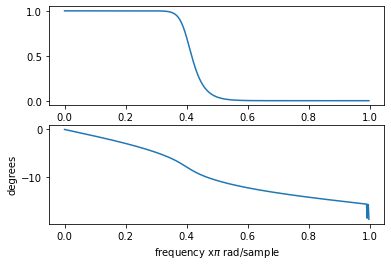

In [103]:
w, Hw = sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

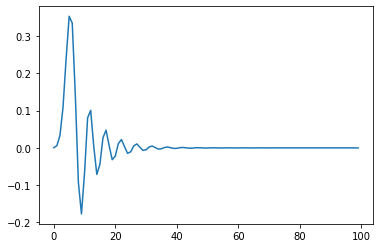

In [104]:
n, hn = sgnl.dimpulse((b,a,1), n=100) # compute the impulse response␣,→for 100 points
plt.figure()
plt.plot(n, np.squeeze(hn))

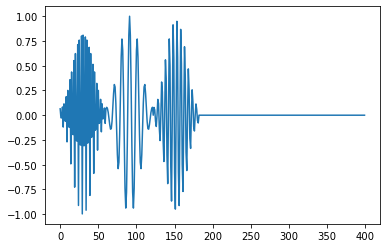

In [105]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency␣,→components)
n1 = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n1/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n1) # component with w1 = 0.2*pi␣,→frequency
x2 = wn*np.cos(0.4*np.pi*n1 - np.pi/2) # component with w1 = 0.4*pi␣,→frequency
x3 = wn*np.cos(0.8*np.pi*n1 - np.pi/5) # component with w1 = 0.8*pi␣,→frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis=None)
plt.figure()
plt.plot(xn)

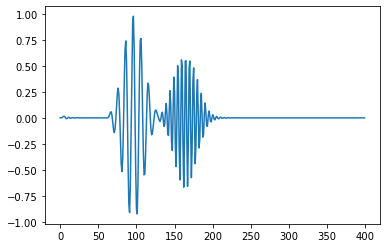

In [106]:
yn = sgnl.lfilter(b, a, xn) # using the coefficients, we applied the␣,→signal to the input of the filter.
plt.figure()
plt.plot(yn)

In [107]:

# coding: utf-8

# In[ ]:

# Copyright (c) 2020 Hasan Huseyin Sonmez
#
# The following code implements a pole-zero diagram for discrete-time signal/systems
# It has been written to mimic the "zplane" function of Mathworks' MATLAB software.
# it is aimed as a supplementary tool to be used in
# ELM368 Fundamentals of Digital Signal Processing-laboratory course.
# Gebze Technical University, Kocaeli, Turkey
#
# The function parameters are:
#     Input:
#            b : the numerator coefficients of the discrete-time signal/system
#            a : the denominator coefficients of the discrete-time signal/system
#


# In[29]:


def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# In[ ]:



# SORULAR

# SORU 1

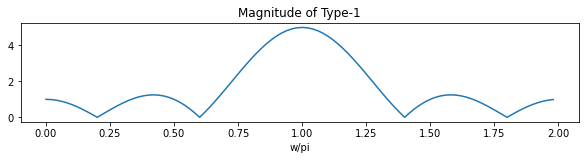

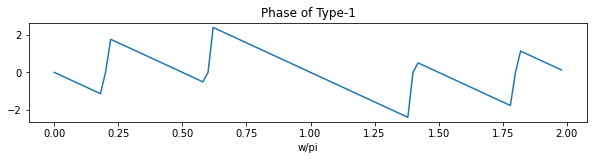

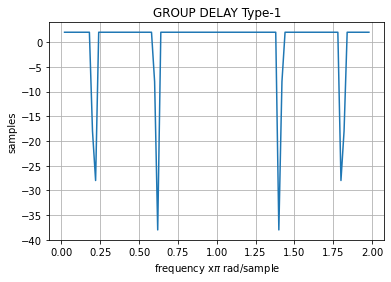

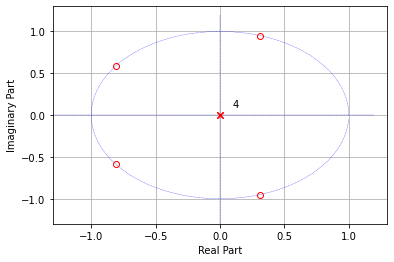

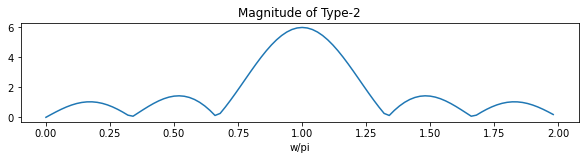

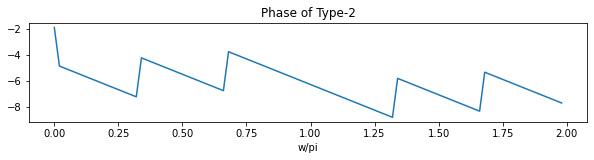

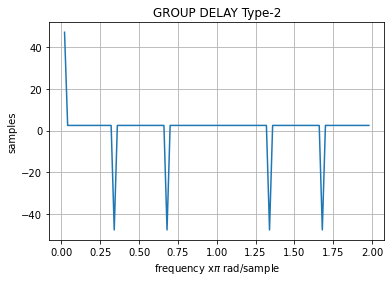

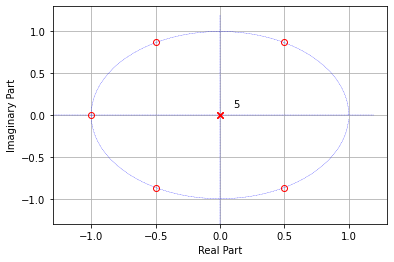

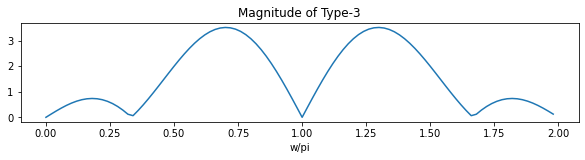

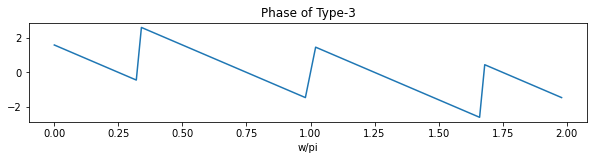

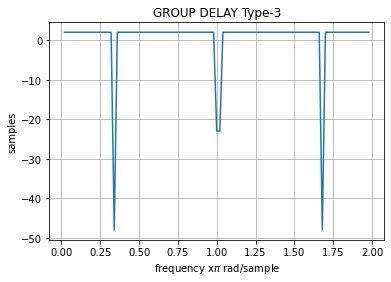

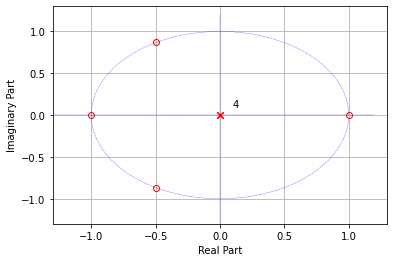

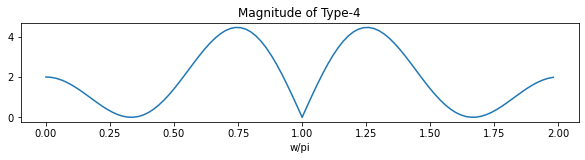

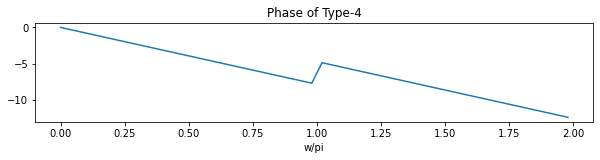

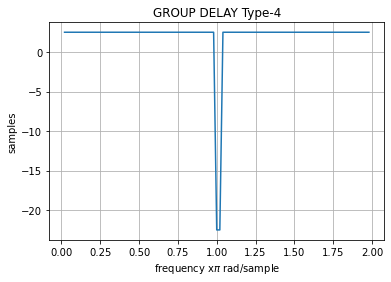

In [108]:
###################---TYPE 1 ----##################
h1 = np.array([1,1,1,1,1])
N = 100
w = np.arange(0, 2*np.pi, 2*np.pi/N) 
xw = np.fft.fftshift(np.fft.fft(h1,N))

xwMag = np.abs(xw)
xwPhs = np.unwrap(np.angle(xw))

## Plotting the Magnitude of xw ##
plt.figure(figsize = (10,4))
plt.subplot(211)
plt.title("Magnitude of Type-1")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xwMag)

## Plotting the Phase of xw ##
plt.figure(figsize = (10,4))
plt.subplot(212)
plt.plot(w/np.pi, xwPhs)
plt.title("Phase of Type-1")
plt.xlabel("w/pi")

# Calculate the group delay of the system:
tau_w = -np.diff(xwPhs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.title("GROUP DELAY Type-1")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

# Z-Plane
# Z-plane için num denum değerleri h sinyalinin z transformu alınıp pozitif üstel değerlere getirilerek elde edilmiştir.
# 1 + z^-1 + z^-2 + z^-3 + z^-4 = (z^4 + z^3 + z^2 + z^1 + z^0)/(z^4) 
num = np.array([1,1,1,1,1])
denum = np.array([1,0,0,0,0])

zplane(num,denum)

###################---TYPE 2 ----##################
h2 = np.array([1,1,1,1,1,1])
N = 100
w = np.arange(0, 2*np.pi, 2*np.pi/N)  
xw2 = np.fft.fftshift(np.fft.fft(h2,N))

xw2Mag = np.abs(xw2)
xw2Phs = np.unwrap(np.angle(xw2))

## Plotting the Magnitude of xw ##
plt.figure(figsize = (10,4))
plt.subplot(211)
plt.title("Magnitude of Type-2")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xw2Mag)

## Plotting the Phase of xw ##
plt.figure(figsize = (10,4))
plt.subplot(212)
plt.title("Phase of Type-2")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xw2Phs)

# Calculate the group delay of the system:
tau_w2 = -np.diff(xw2Phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w2)
plt.title("GROUP DELAY Type-2")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

# Z-Plane
# Z-plane için num denum değerleri h sinyalinin z transformu alınıp pozitif üstel değerlere getirilerek elde edilmiştir.
# 1 + z^-1 + z^-2 + z^-3 + z^-4 + z^-5= (z^5 +z^4 + z^3 + z^2 + z^1 + z^0)/(z^4) 
num = np.array([1,1,1,1,1,1])
denum = np.array([1,0,0,0,0,0])

zplane(num,denum)


###################---TYPE 3 ----##################
h3 = np.array([1,1,0,-1,-1])
N = 100
w = np.arange(0, 2*np.pi, 2*np.pi/N) 
xw3 = np.fft.fftshift(np.fft.fft(h3,N))

xw3Mag = np.abs(xw3)
xw3Phs = np.unwrap(np.angle(xw3))

## Plotting the Magnitude of xw ##
plt.figure(figsize = (10,4))
plt.subplot(211)
plt.title("Magnitude of Type-3")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xw3Mag)

## Plotting the Phase of xw ##
plt.figure(figsize = (10,4))
plt.subplot(212)
plt.title("Phase of Type-3")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xw3Phs)

# Calculate the group delay of the system:
tau_w3 = -np.diff(xw3Phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w3)
plt.title("GROUP DELAY Type-3")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

# Z-Plane
# Z-plane için num denum değerleri h sinyalinin z transformu alınıp pozitif üstel değerlere getirilerek elde edilmiştir.
# 1 + z^-1 - z^-3 - z^-4= (z^4 + z^3 - z^1 - z^0)/(z^4) 
num = np.array([1,1,0,-1,-1])
denum = np.array([1,0,0,0,0])

zplane(num,denum)

###################---TYPE 4 ----##################
h4 = np.array([1,1,1,-1,-1,-1])
N = 100
w = np.arange(0, 2*np.pi, 2*np.pi/N) 
xw4 = np.fft.fftshift(np.fft.fft(h4,N))

xw4Mag = np.abs(xw4)
xw4Phs = np.unwrap(np.angle(xw4))

## Plotting the Magnitude of xw ##
plt.figure(figsize = (10,4))
plt.subplot(211)
plt.title("Magnitude of Type-4")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xw4Mag)

## Plotting the Phase of xw ##
plt.figure(figsize = (10,4))
plt.subplot(212)
plt.title("Phase of Type-4")
plt.xlabel("w/pi")
plt.plot(w/np.pi, xw4Phs)

# Calculate the group delay of the system:
tau_w4 = -np.diff(xw4Phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w4)
plt.title("GROUP DELAY Type-4")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

num = np.array([1,1,1,-1,-1,-1])
denum = np.array([1,0,0,0,0,0])

#zplane(num,denum)



## Yukarıda lineer faza sahip dört tip sistem bulunmaktadır. Bu sistemler için sistemlerin sadece genlik cevaplarına bakılarak bant geçiren filtre olduğu söylenebilir. Filtre hakkında herhangi diğer bilgi verilmediği takdirde filtrelerin girişi sıfırladığı ve geçirdiği bölgeler önemlidir. Bu durumda ilk iki tip sadece pi çevresini geçirirken son iki tip 1.25pi ve 0.75pi merkezli bölgeleri geçirdiği görülür. 

## Sistemler belirli bölgelerde sabit grup gecikmelerine sahiptirler. Bu bölgeler sistemlerin lineer faza sahip olduğu bölgelerdir. Fazda lineerliğin bozulduğu bölgelerde grup gecikmesinde anlık değişiklikler gözlemlenmiştir. 

## Sistemin kutup-sıfır diyagramı incelendiğinde, 1. tip filtrenin neredeyse her tip filtrede olarak tasarlanabilecek esneklikte olduğu gözlenir.

## 2. tip filtre -1 noktasındaki zero'dan kaynaklı yüksek geçiren olarak tasarlanamamaktadır. 

## 3. tip filtre -1 ve +1 noktalarındaki zero'lardan kaynaklı alçak geçiren veya yüksek geçiren filtre olarak tasarlanamamaktadır. 

## 4. tip filtre +1 noktasındaki zero'dan dolayı alçak geçiren filtre olmaya elverişli değildir. 

# SORU 2

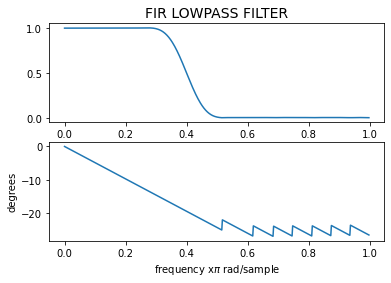

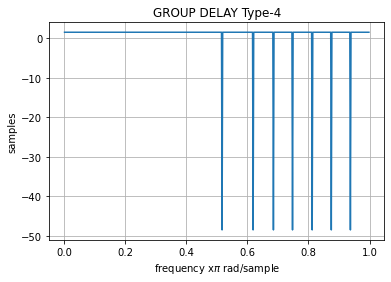

In [109]:
# importing an FIR LOWPASS filter
filter_data = loadmat('lowpassv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
#print(b)
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax1.set_title('FIR LOWPASS FILTER',size = '14')
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')

plt.xlabel('frequency x$\pi$ rad/sample')

tau_w4 = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w4)
plt.title("GROUP DELAY Type-4")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()


## Yukarıda FIR bir alçak geçiren filtre verilmektedir. Filtrenin genlik değerine bakıldığında (y eksenine göre simetrik olduğu bilinmektedir.) x = 0 merkezli ve yaklaşık 0.3pi bant genişliğine sahip olduğu görülmektedir. Filtrenin geçirme bölgesinde doğrusal faza ve sabit grup gecikmesine sahip olduğu görülmektedir. Sönümleme bandında fazın doğrusallığı bozulduğundan grup gecikmesi değeri anlık değişimlere uğramaktadır.

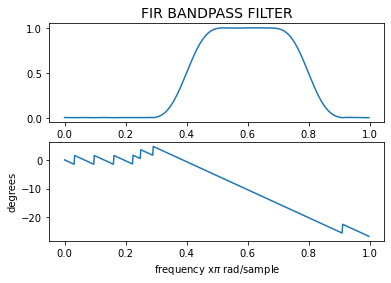

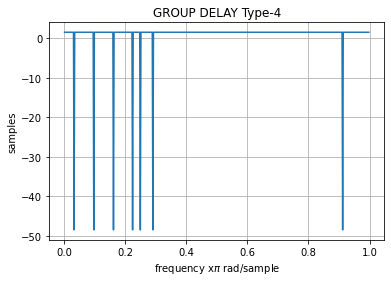

In [110]:
# importing an IIR filter
filter_data = loadmat('bandpassv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
#print(b)
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax1.set_title('FIR BANDPASS FILTER',size = '14')
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w4 = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w4)
plt.title("GROUP DELAY Type-4")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

## Yukarıda FIR bir bant geçiren filtre verilmektedir. Filtrenin genlik değerine bakıldığında x = 0.6pi merkezli ve yaklaşık 0.3pi bant genişliğine sahip olduğu görülmektedir. Filtrenin geçirme bölgesinde doğrusal faza ve sabit grup gecikmesine sahip olduğu görülmektedir. Sönümleme bandında fazın doğrusallığı bozulduğundan grup gecikmesi değeri anlık değişimlere uğramaktadır.

# SORU 3


[1.53155491e-02 1.41982948e-01 6.71685324e-01 2.12424982e+00
 4.98586560e+00 9.15626261e+00 1.35498300e+01 1.64229890e+01
 1.64229890e+01 1.35498300e+01 9.15626261e+00 4.98586560e+00
 2.12424982e+00 6.71685324e-01 1.41982948e-01 1.53155491e-02]


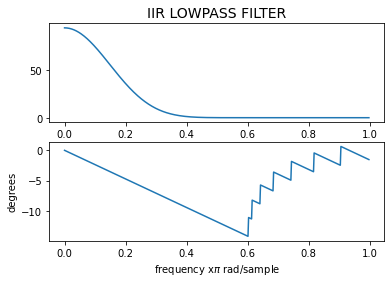

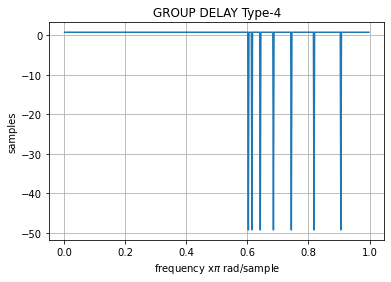

In [111]:
# importing an IIR filter
filter_data = loadmat('lowpassIIRv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
print(b)
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax1.set_title('IIR LOWPASS FILTER',size = '14')
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w4 = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w4)
plt.title("GROUP DELAY Type-4")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

## Yukarıda IIR bir alçak geçiren filtre verilmektedir. Filtrenin genlik değerine bakıldığında x = 0 merkezli ve yaklaşık 0.3pi bant genişliğine sahip olduğu görülmektedir. Filtrenin geçirme bölgesinde doğrusal faza ve sabit grup gecikmesine sahip olduğu görülmektedir. Sönümleme bandında fazın doğrusallığı bozulduğundan grup gecikmesi değeri anlık değişimlere uğramaktadır.

[ 5.19294199e-06 -6.23153039e-05  3.42734171e-04 -1.14244724e-03
  2.57050629e-03 -4.11281006e-03  4.79827840e-03 -4.11281006e-03
  2.57050629e-03 -1.14244724e-03  3.42734171e-04 -6.23153039e-05
  5.19294199e-06]


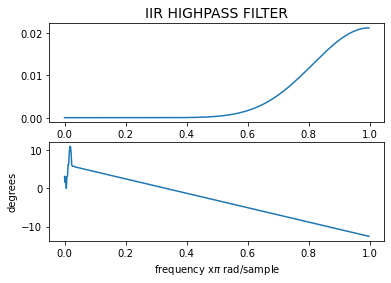

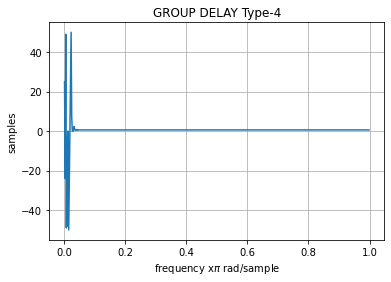

In [112]:
# importing an IIR filter
filter_data = loadmat('highpassv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
print(b)
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax1.set_title('IIR HIGHPASS FILTER',size = '14')
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w4 = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w4)
plt.title("GROUP DELAY Type-4")
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

## Yukarıda IIR bir yüksek geçiren filtre verilmektedir. Filtrenin genlik değerine bakıldığında x = 0.6pi değerinden büyük değerleri geçirdiği görülmektedir. Filtrenin geçirme bölgesinde doğrusal faza ve sabit grup gecikmesine sahip olduğu görülmektedir. Sönümleme bandında fazın doğrusallığı bozulduğundan grup gecikmesi değeri anlık değişimlere uğramaktadır.

# SORU 4


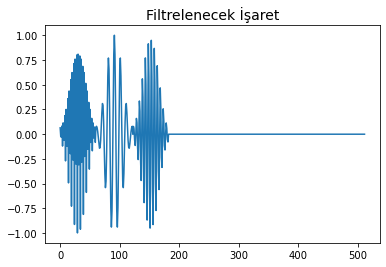

In [113]:
# Generate the individual components and the input signal
N = 512 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency␣,→components)
n = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5) # component with w1 = 0.8*pi frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)
plt.figure()
plt.title("Filtrelenecek İşaret", size = '14')
plt.plot(xn)


In [114]:
# Calculate the Fourier transform of xn
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

# FİLTRE 1 - FIR LOWPASS FILTER

In [115]:
# importing an FIR filter
filter_data = loadmat('lowpassv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))


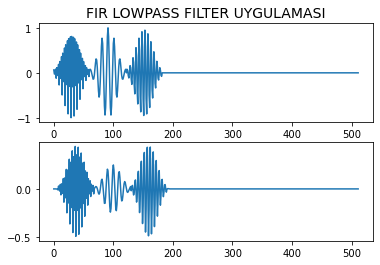

In [116]:
Yw_shifted = Hw * Xw_shifted # we multiply the frequency response of␣,→the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣,→the real component (because of numerical consistency)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax1.set_title('FIR LOWPASS FILTER UYGULAMASI',size = '14')
ax2.plot(yn)

## İşaretin filtrelenmesi sonucunda x = 0 çevresi filtreden geçmeli ve filtre bant genişliği dışında kalan bölge sönümlenmelidir. Bu filtre için N derecesi yetersiz kaldığından sönümlemenin yetersiz olduğu görülmektedir. Ayırt edilen üç sinyalden sadece ilkinin filtreden geçmesi beklenen durumdur. 

# FİLTRE 2 - FIR BANDPASS FILTER

In [117]:
# importing an FIR filter
filter_data = loadmat('bandpassv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))


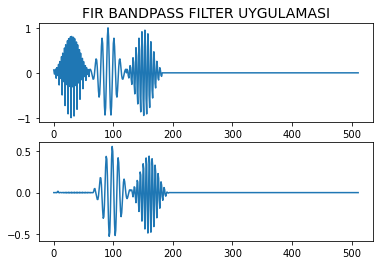

In [118]:
Yw_shifted = Hw * Xw_shifted # we multiply the frequency response of␣,→the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣,→the real component (because of numerical consistency)
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('FIR BANDPASS FILTER UYGULAMASI',size = '14')
ax1.plot(xn)
ax2.plot(yn)

### fm = merkez frekansı olmak üzere;
## İşaretin filtrelenmesi sonucunda x = fm çevresi filtreden geçmeli ve filtre bant genişliği dışında kalan bölge sönümlenmelidir. Ayırt edilen üç sinyalden sadece ikisi filtreden geçmeektedir. İlki filtre geçirme bandında bulunmadığından sönümlenmektedir. 

# FİLTRE 3 - IIR LOWPASS FILTER

In [119]:
# importing an IIR filter
filter_data = loadmat('lowpassIIRv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))


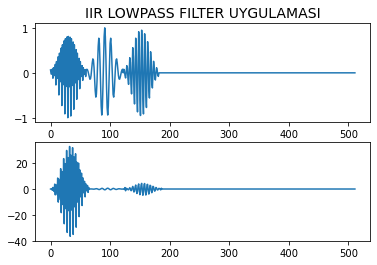

In [120]:
Yw_shifted = Hw * Xw_shifted # we multiply the frequency response of␣,→the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣,→the real component (because of numerical consistency)
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('IIR LOWPASS FILTER UYGULAMASI',size = '14')
ax1.plot(xn)
ax2.plot(yn)

## İşaretin filtrelenmesi sonucunda x = 0 çevresi filtreden geçmeli ve filtre bant genişliği dışında kalan bölge sönümlenmelidir. Bu filtre için N derecesi ilk filtreye kıyasla daha yeterli olduğundan sönümlemenin daha doğru olduğu görülmektedir. Ayırt edilen üç sinyalden sadece ilkinin filtreden geçmesi beklenen durumdur. 

# FİLTRE 4 - IIR HIGHPASS FILTER

In [121]:
# importing an IIR filter
filter_data = loadmat('highpassv02.mat') # load the filter obtained from␣,→pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and␣,→convert them to float (from string)
b = Coeffs[0] # first column is b
w, Hw = sgnl.freqz(b)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))


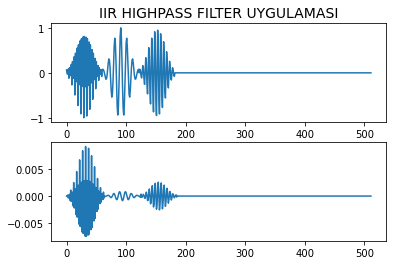

In [122]:
Yw_shifted = Hw * Xw_shifted # we multiply the frequency response of␣,→the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take␣,→the real component (because of numerical consistency)
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_title('IIR HIGHPASS FILTER UYGULAMASI',size = '14')
ax1.plot(xn)
ax2.plot(yn)

### fx geçirme bandı alt frekans sınırı olmak üzere;
## İşaretin filtrelenmesi sonucunda x = fx ve üzeri frekansların filtreden geçmesi beklenmektedir. Filtreden beklenen sonuç alınamamıştır. 